# <center> Data Munging

## Load Pacakage

In [21]:
import plotly.express as px
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
from sklearn.model_selection import train_test_split

## Load data

In [22]:
DF = pd.read_csv('data/steam_reviews.csv')
DF.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


In [23]:
DF.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


Create a histogram for arecommendation.

In [24]:
fig = px.histogram(DF, x='recommendation')
#fig.show()

Create a function to clean text.

In [25]:
def preprocess(str_arg):
        cleaned_str=re.sub('[^a-z\s]+',' ',str(str_arg), flags=re.IGNORECASE) #every char except alphabets is replaced
        cleaned_str=re.sub('(\s+)',' ',cleaned_str) #multiple spaces are replaced by single space
        cleaned_str=cleaned_str.lower() #converting the cleaned string to lower case
        
        return cleaned_str # returning the preprocessed string

Clean text.

In [26]:
DF_len = [None]*len(DF)
for i in range(0, len(DF)):
    DF_len[i] = len(preprocess(DF.iloc[i,6]).split(' '))
DF_len = pd.DataFrame({'length': DF_len})

Create a histogram for review length.

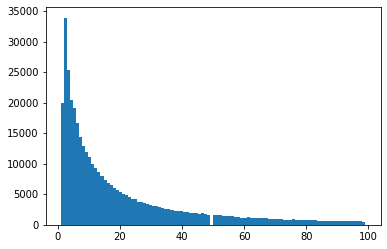

In [27]:
plt.figure()
plt.hist(DF_len[DF_len['length']<100], bins = 100)
plt.savefig('Visualizations/Histogram.jpg')

There are a lot of reviews are less than 5. We think the review less than 5 is not useful. Hence we only keep the reviews is longer than 5 words.

In [28]:
DF_Clean = DF[DF_len['length']>=5]

Clean the text.

In [29]:
DF_Clean_list = [None] * len(DF_Clean)
for i in range(0, len(DF_Clean)):
    DF_Clean_list[i] = preprocess(DF_Clean.iloc[i,6])

Change to reviews in dataframe to be cleaned reviews.

In [30]:
DF_Clean_DF = pd.DataFrame({'review': DF_Clean_list})
DF_Clean_DF.head()

,review
0,gt played as german reich gt declare war on b...
1,very good game although a bit overpriced in my...
2,out of all the reviews i wrote this one is pro...
3,disclaimer i survivor main i play games for fu...
4,english after playing for more than two years ...


Drop the useless columns.

In [31]:
DF_Clean = DF_Clean.drop('review',axis=1)
DF_Clean = DF_Clean.reset_index(drop=True)

Insert the clean reviews

In [32]:
DF_Clean.insert(7,'review',DF_Clean_DF)
DF_Clean.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,title,review
0,2019-02-10,2,4,578,False,Recommended,Expansion - Hearts of Iron IV: Man the Guns,gt played as german reich gt declare war on b...
1,2019-02-07,0,0,892,False,Recommended,Expansion - Hearts of Iron IV: Man the Guns,very good game although a bit overpriced in my...
2,2018-06-14,126,1086,676,False,Recommended,Dead by Daylight,out of all the reviews i wrote this one is pro...
3,2017-06-20,85,2139,612,False,Recommended,Dead by Daylight,disclaimer i survivor main i play games for fu...
4,2016-12-12,4,55,2694,False,Recommended,Dead by Daylight,english after playing for more than two years ...


Create a histogram for recommendation.

In [33]:
fig = px.histogram(DF_Clean, x='recommendation')
#fig.show()

Set a clean data.

In [34]:
MYDF_Clean = pd.DataFrame({'review':DF_Clean['review'], 'recommendation':DF_Clean['recommendation']})
MYDF_Clean.sample(5)

,review,recommendation
199902,the only game that i didnt wait a sale for,Recommended
233829,the game is the best battle royale game but th...,Recommended
330228,the game has a steep learning curve but wants ...,Recommended
163849,taking away single player modding prevents me ...,Not Recommended
112824,on behalf of the openiv team you,Not Recommended


In [35]:
_1 = []
_2 = []
all = []
for i in range(len(MYDF_Clean)):
    if MYDF_Clean.iloc[i,1] == 'Recommended':
        _1.append(MYDF_Clean.iloc[i,0])
    else:
        _2.append(MYDF_Clean.iloc[i,0])
all.append(_1)
all.append(_2)

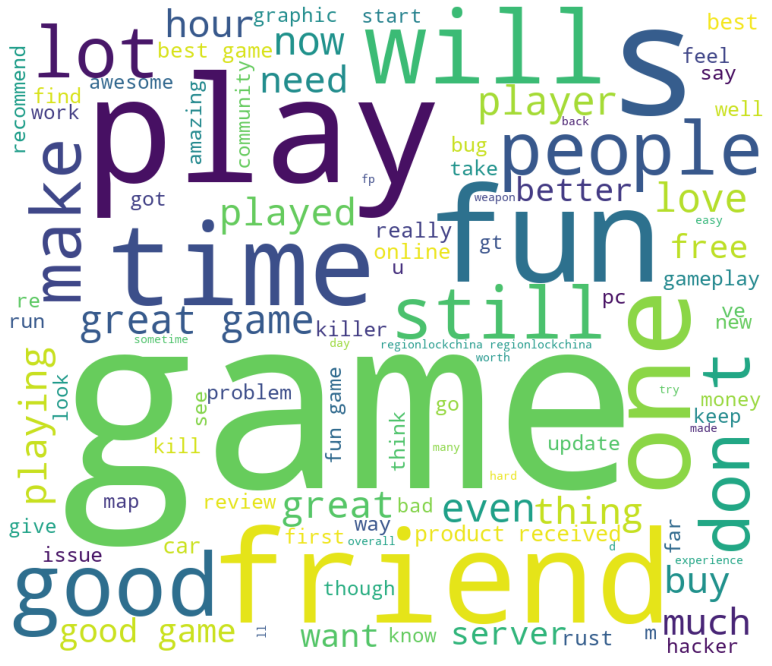

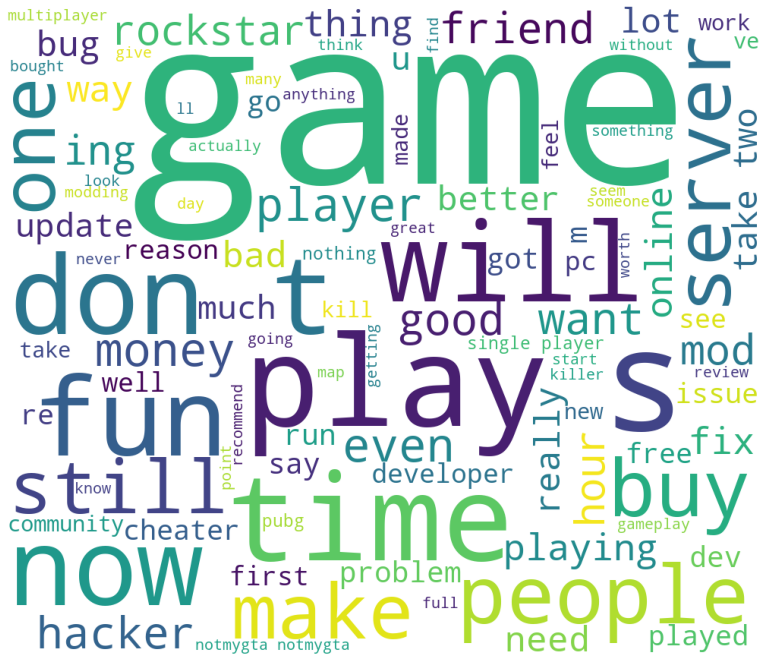

In [36]:
i=1
for list in all:
    text = ''
    rand = random.sample(range(0,len(list)), int(0.1*len(list)))
    for r in rand:
        text=text +' '+ str(list[r])
    #print(text)
    plt.figure(figsize=(18, 12))
    wordcloud = WordCloud(background_color="white", max_words=100, 
                      width=1000, height=860, margin=2).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig('Visualizations/wordcloud'+str(i)+'.jpg')
    i=i+1
    plt.show()

Save clean data to local csv file.

In [37]:
MYDF_Clean.to_csv('Steam_Clean_Data.csv',index=False,sep=',')

## Train and Test Splitting.

Split data based on label recommendation.

In [38]:
Train_reco,Test_reco = train_test_split(MYDF_Clean, test_size = 0.25, stratify=MYDF_Clean['recommendation'], random_state = 580) 

In [39]:
Train_reco.to_csv('data/Train_reco.csv',index=False,sep=',')
Test_reco.to_csv('data/Test_reco.csv',index=False,sep=',')